In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/user_data/mmhender/imStat/code/')


In [17]:
from scipy.io import loadmat
from utils import stats_utils
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
feature_ims = clust['clusters']['clusters'][0][0]

# Measuring approximate orientation of each sketch token feature, 
# based on simple filter in FFT space

orient_meas = np.arange(0,180,5)
n_features = feature_ims.shape[2]
orient_activs = np.zeros((n_features, len(orient_meas)))

n_pix = feature_ims.shape[0]
xx,yy = np.meshgrid(np.linspace(-1,1,n_pix), np.linspace(-1,1,n_pix))
rr = np.sqrt((xx)**2 + (yy)**2)
angle = np.arccos(xx/rr)
angle[yy>0] = np.pi - angle[yy>0]
angle = np.mod(angle+np.pi/2, np.pi)
angle[np.isnan(angle)] = 0
angle = angle/np.pi*180

vm_conc = 10 # control precision of orientation filter
orient_filters = np.array([stats_utils.von_mises_deg(angle,mu=oo,k=vm_conc,normalize=True) \
                           for oo in orient_meas])
for ff in range(n_features):
    im_fft = np.fft.fftshift(np.fft.fft2(feature_ims[:,:,ff]))   
    orient_activs[ff,:] = np.tensordot(orient_filters, np.abs(im_fft))
    
max_orient = orient_meas[np.argmax(orient_activs, axis=1)]
max_orient_activ = np.max(orient_activs, axis=1)


/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in remainder


In [16]:
np.any(np.isnan(angle))

True

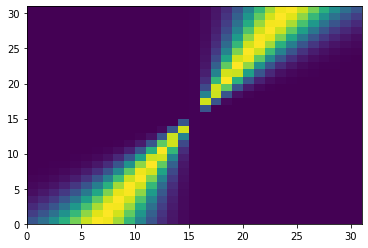

In [4]:
plt.figure();
plt.pcolormesh(np.abs(orient_filters[6,:,:]))

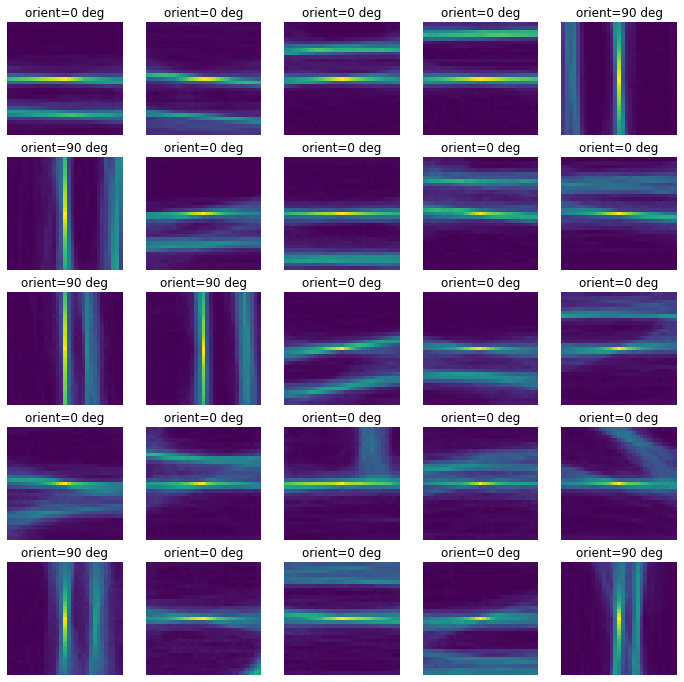

In [5]:
ims2plot = np.flip(np.argsort(max_orient_activ))[0:25]
plt.figure(figsize=(12,12));
for ii, im in enumerate(ims2plot):
    plt.subplot(5,5,ii+1)
    plt.pcolormesh(feature_ims[:,:,im])
    plt.gca().invert_yaxis()
    plt.axis('off')
#     plt.axis('square')
    plt.title('orient=%d deg'%max_orient[im])

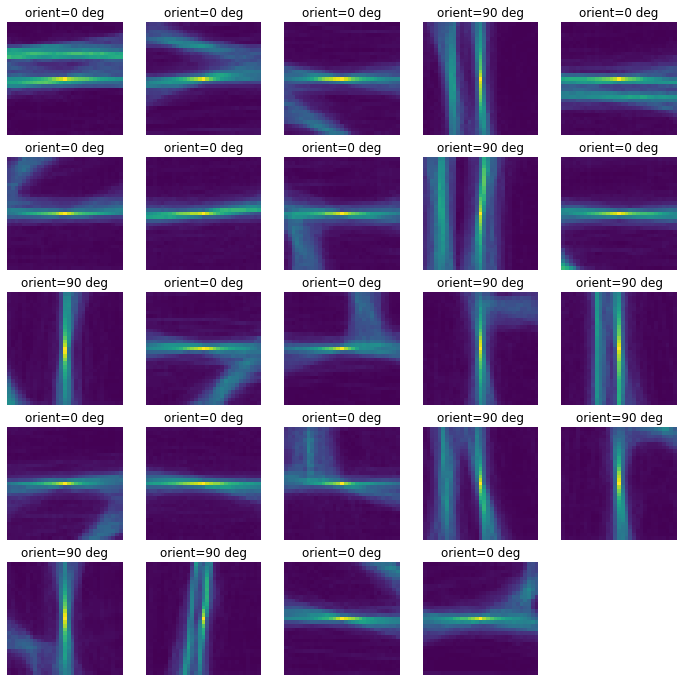

In [31]:
ims2plot = np.flip(np.argsort(max_orient_activ))[26:50]
plt.figure(figsize=(12,12));
for ii, im in enumerate(ims2plot):
    plt.subplot(5,5,ii+1)
    plt.pcolormesh(feature_ims[:,:,im])
    plt.gca().invert_yaxis()
    plt.axis('off')
#     plt.axis('square')
    plt.title('orient=%d deg'%max_orient[im])

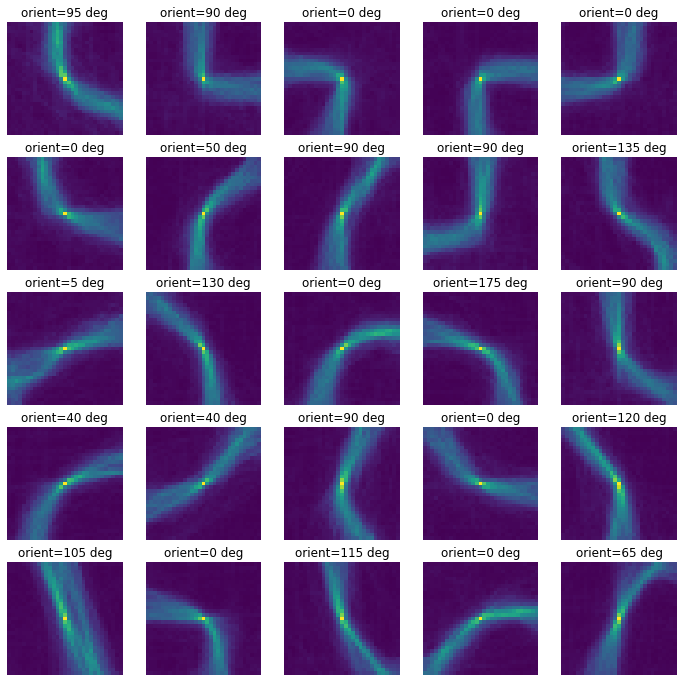

In [29]:
ims2plot = np.argsort(max_orient_activ)[0:25]
plt.figure(figsize=(12,12));
for ii, im in enumerate(ims2plot):
    plt.subplot(5,5,ii+1)
    plt.pcolormesh(feature_ims[:,:,im])
    plt.gca().invert_yaxis()
    plt.axis('off')
#     plt.axis('square')
    plt.title('orient=%d deg'%max_orient[im])

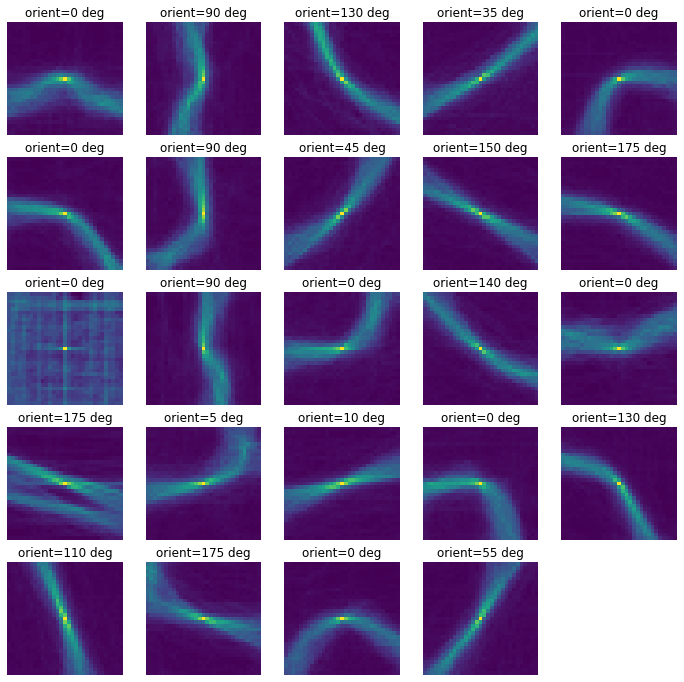

In [30]:
ims2plot = np.argsort(max_orient_activ)[26:50]
plt.figure(figsize=(12,12));
for ii, im in enumerate(ims2plot):
    plt.subplot(5,5,ii+1)
    plt.pcolormesh(feature_ims[:,:,im])
    plt.gca().invert_yaxis()
    plt.axis('off')
#     plt.axis('square')
    plt.title('orient=%d deg'%max_orient[im])

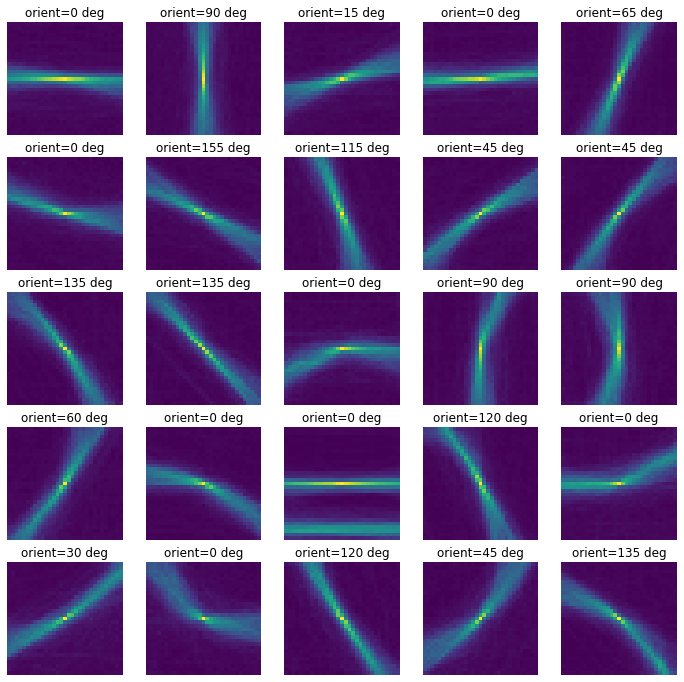

In [160]:
ims2plot = np.arange(0,25)
plt.figure(figsize=(12,12));
for ii, im in enumerate(ims2plot):
    plt.subplot(5,5,ii+1)
    plt.pcolormesh(feature_ims[:,:,im])
    plt.gca().invert_yaxis()
    plt.axis('off')
#     plt.axis('square')
    plt.title('orient=%d deg'%max_orient[im])

Text(0.5, 1.0, 'PCA on average images of each S.T. feature, pixel space')

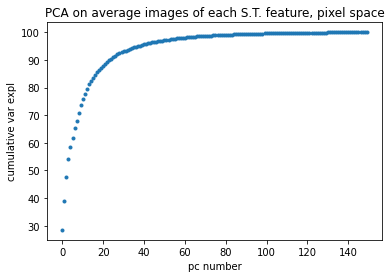

In [33]:
from sklearn import decomposition

feat = np.reshape(feature_ims, [31**2, 150]).T

n_examples = feat.shape[0]
n_comp = feat.shape[1]
pca = decomposition.PCA(n_components = np.min([n_examples, n_comp]), copy=True)
pca.fit(feat)     
scores_st = pca.transform(feat)

st_pca_wts = pca.components_
ev = pca.explained_variance_
st_ev = ev/np.sum(ev)*100
pre_mean = pca.mean_

plt.figure();
# plt.plot(ev,'.')
plt.plot(np.cumsum(st_ev),'.')
plt.xlabel('pc number')
plt.ylabel('cumulative var expl')
plt.title('PCA on average images of each S.T. feature, pixel space')

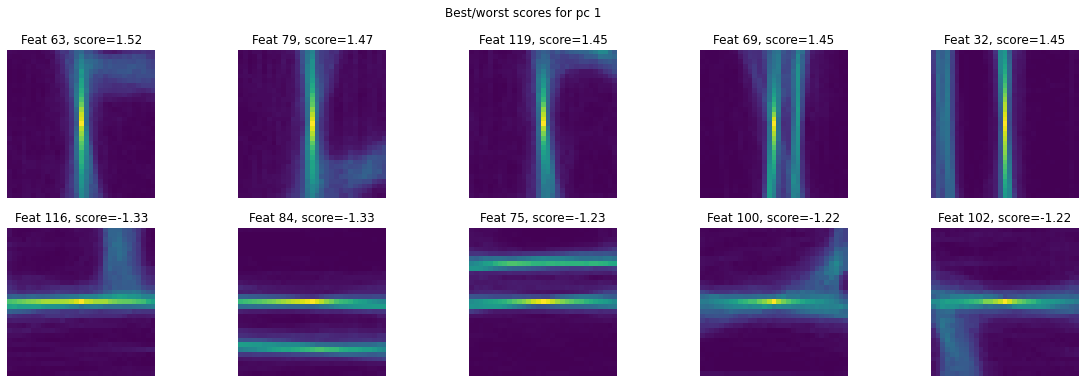

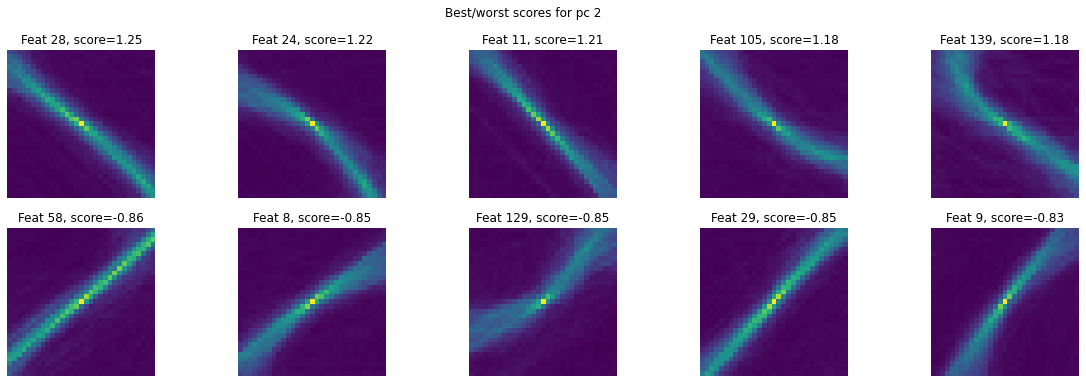

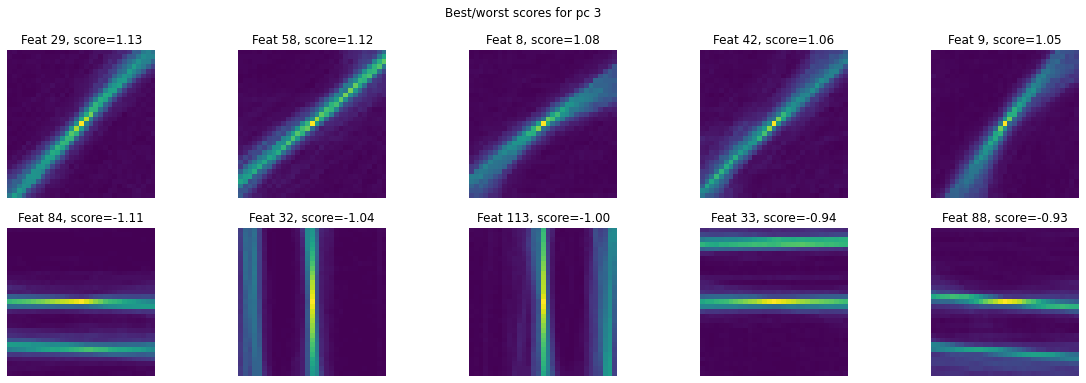

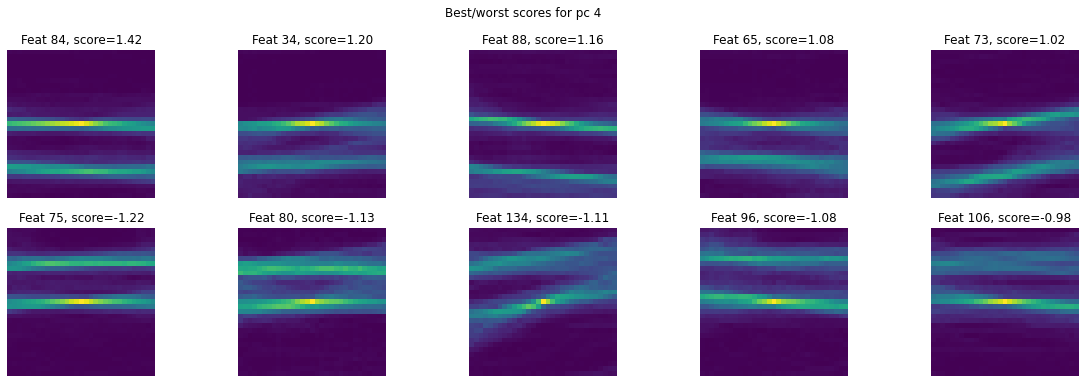

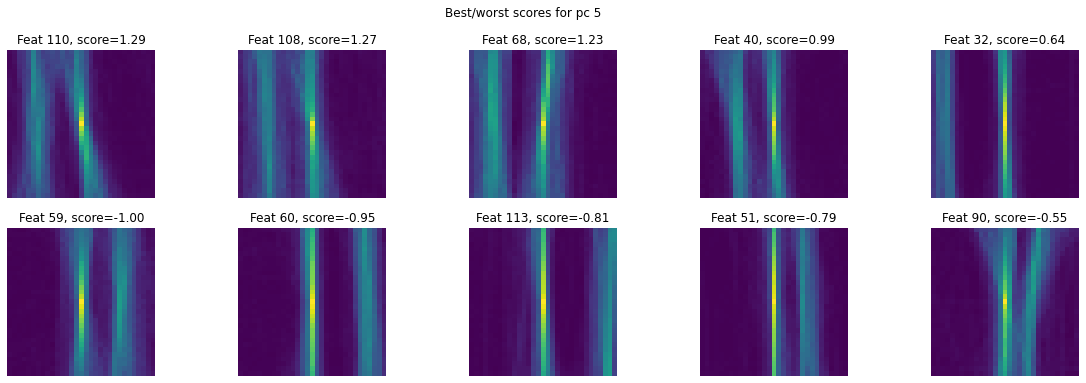

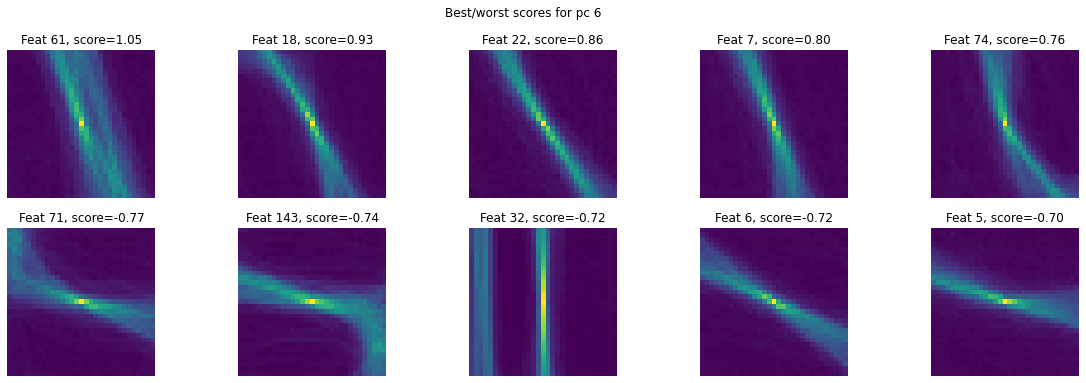

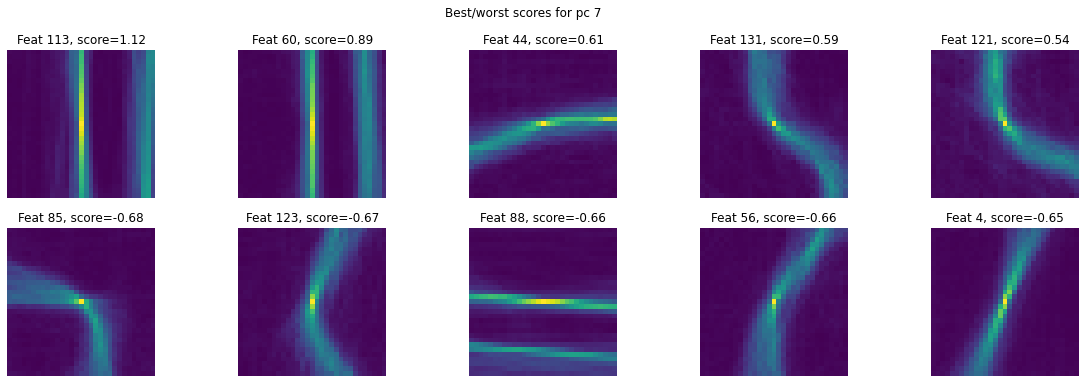

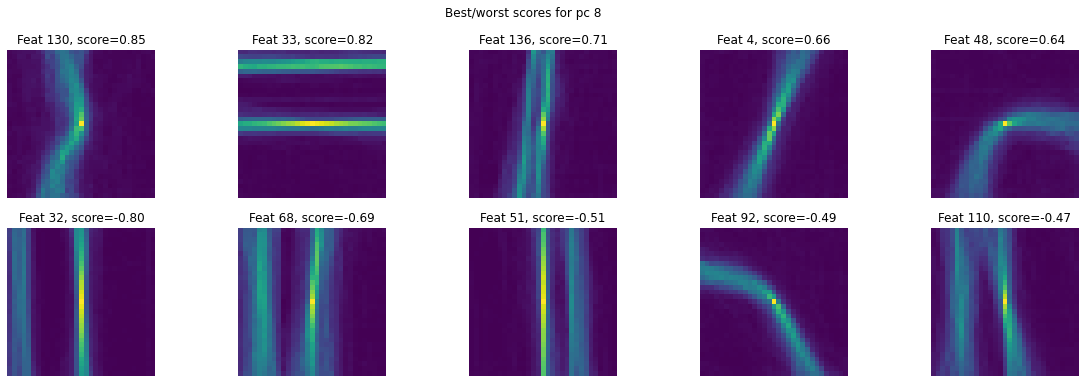

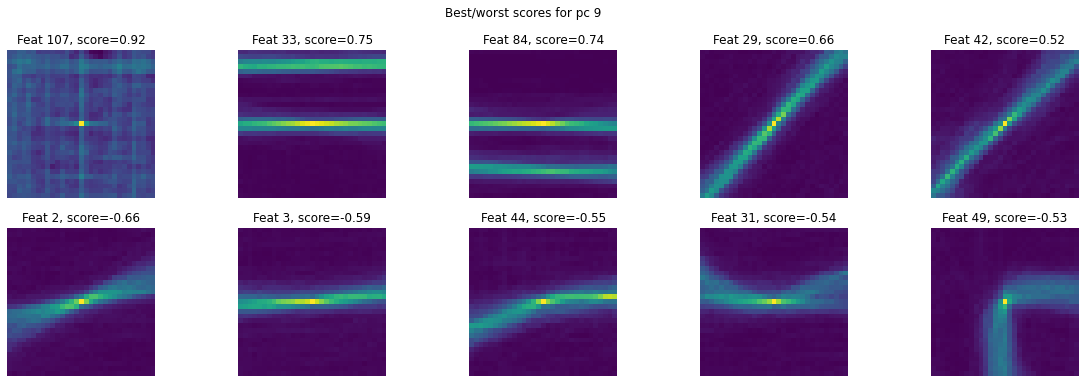

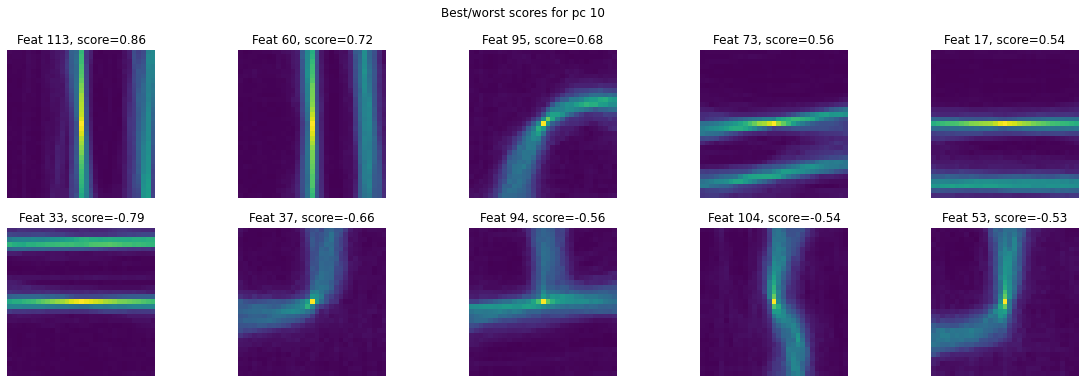

In [34]:
top_n = 5

for pc2plot in range(10):

    best_ims = np.flip(np.argsort(scores_st[:,pc2plot]))[0:top_n]
    worst_ims = np.argsort(scores_st[:,pc2plot])[0:top_n]
    npx = 2; npy = top_n;

    plt.figure(figsize=(20,6))

    for ii, im in enumerate(best_ims):

        plt.subplot(npx,npy,ii+1)
        plt.pcolormesh(feature_ims[:,:,im])
        plt.axis('square')
        plt.axis('off')
        plt.gca().invert_yaxis()
        plt.title('Feat %d, score=%.2f'%(im, scores_st[im,pc2plot]))

    for ii, im in enumerate(worst_ims):

        plt.subplot(npx,npy,ii+1+top_n)
        plt.pcolormesh(feature_ims[:,:,im])
        plt.axis('square')
        plt.axis('off')
        plt.gca().invert_yaxis()
        plt.title('Feat %d, score=%.2f'%(im, scores_st[im,pc2plot]))

    plt.suptitle('Best/worst scores for pc %d '%(pc2plot+1))

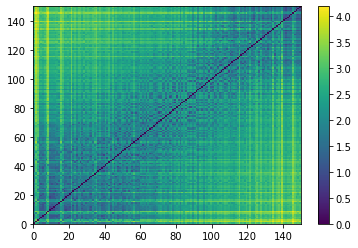

In [35]:
import scipy.spatial

order = np.argsort(scores_st[:,0])
clust_reshaped_ordered = feat[order,:]
cluster_dist = scipy.spatial.distance.squareform(\
                     scipy.spatial.distance.pdist(clust_reshaped_ordered, metric='Euclidean'))

plt.figure();
plt.pcolormesh(cluster_dist)
plt.colorbar()

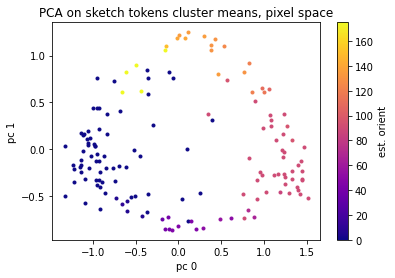

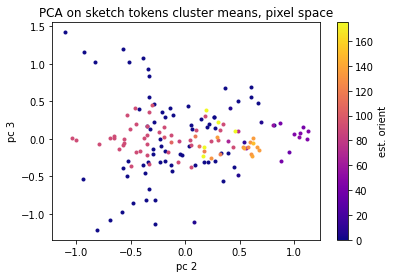

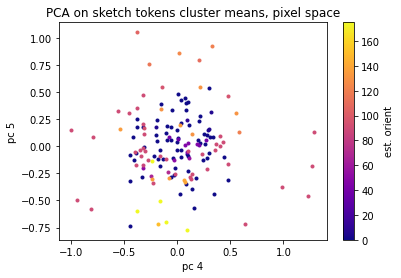

In [49]:

import matplotlib
from matplotlib import cm

for pc2plot in [[0,1],[2,3],[4,5]]:
    
    fig = plt.figure();
    colors = cm.plasma(np.linspace(0,1,len(orient_meas)))
    for ii, oo in enumerate(orient_meas):
        inds = np.where(max_orient==oo)[0]
        plt.plot(scores_st[inds,pc2plot[0]], scores_st[inds,pc2plot[1]], '.',color=colors[ii,:])

    scalmap = cm.ScalarMappable(matplotlib.colors.Normalize(vmin=0, vmax=175),\
                      cmap='plasma')
    fig.colorbar(scalmap, orientation='vertical', label='est. orient')
    plt.xlabel('pc %d'%pc2plot[0])
    plt.ylabel('pc %d'%pc2plot[1])

    plt.title('PCA on sketch tokens cluster means, pixel space')

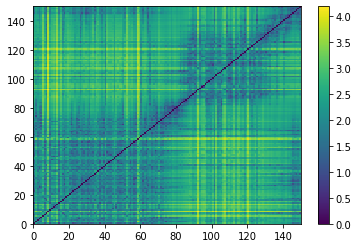

In [51]:
import scipy.spatial
order = np.argsort(max_orient)
feat = np.reshape(feature_ims, [31**2, 150]).T
clust_reshaped_ordered = feat[order,:]
cluster_dist = scipy.spatial.distance.squareform(\
                     scipy.spatial.distance.pdist(clust_reshaped_ordered, metric='Euclidean'))

plt.figure();
plt.pcolormesh(cluster_dist)
plt.colorbar()

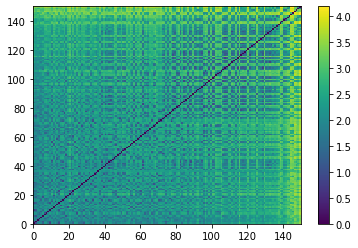

In [52]:
import scipy.spatial
order = np.argsort(max_orient_activ)
feat = np.reshape(feature_ims, [31**2, 150]).T
clust_reshaped_ordered = feat[order,:]
cluster_dist = scipy.spatial.distance.squareform(\
                     scipy.spatial.distance.pdist(clust_reshaped_ordered, metric='Euclidean'))

plt.figure();
plt.pcolormesh(cluster_dist)
plt.colorbar()